In [1]:
# imports
import scipy
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.neighbors
import sklearn.ensemble
import sklearn.metrics

%matplotlib ipympl
%load_ext autoreload
%autoreload 2

In [2]:
plt.close('all')

# Thyroid dataset analysys and tests

In [3]:
# labels are 0 1 where 1 is anomaly. Feature 1 is an integer. Other features are continuos
thyroid_data = pd.read_csv('thyroid.csv') 

In [4]:
# load thyroid dataset
thyroid_data_columns = thyroid_data.columns
thyroid_features = thyroid_data[thyroid_data_columns[:6]]
thyroid_labels = thyroid_data[thyroid_data_columns[6]]

# change labels so 1 in no anomalyand -1 is anomaly (sklearn anomaly detecion convention)
thyroid_labels[thyroid_labels == 1] = -1
thyroid_labels[thyroid_labels == 0] = 1

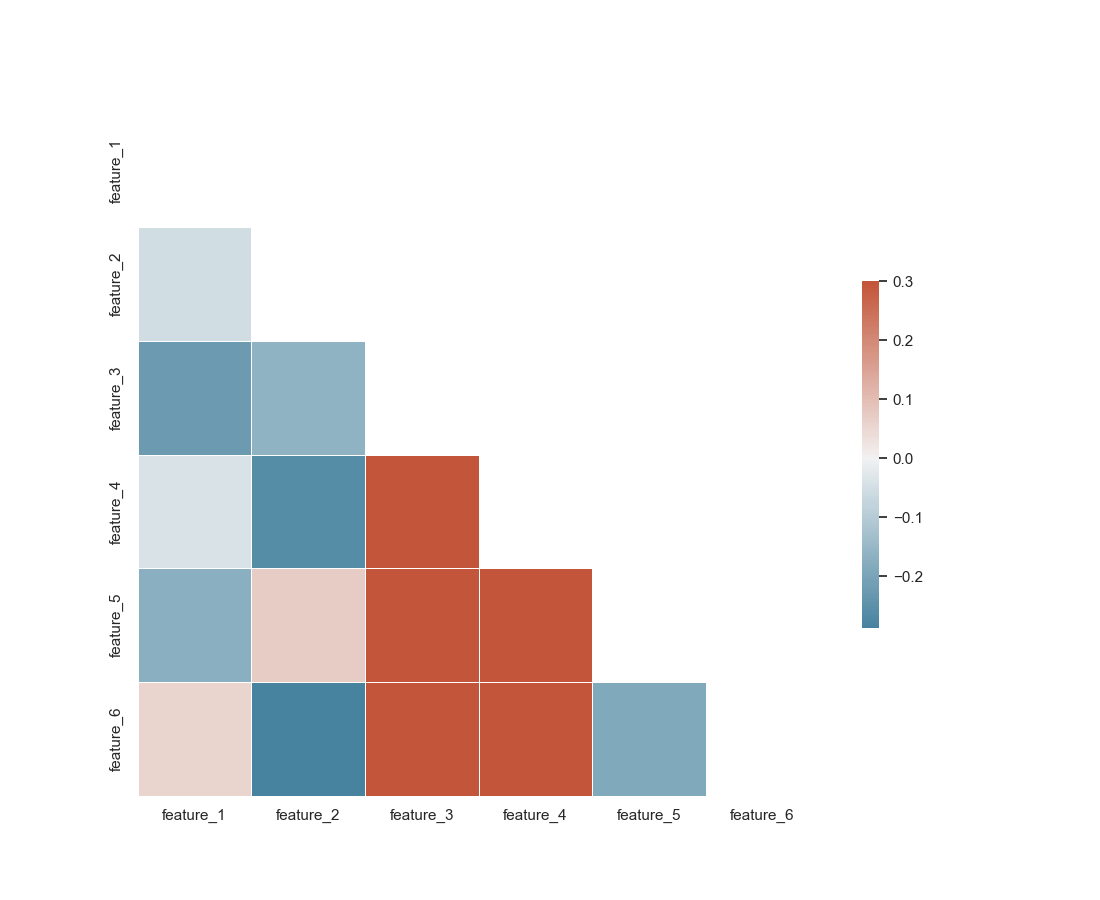

In [5]:
#Feature corelation plot  

#correlation between features
sns.set_theme(style="white")
# Compute the correlation matrix
corr = thyroid_features.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

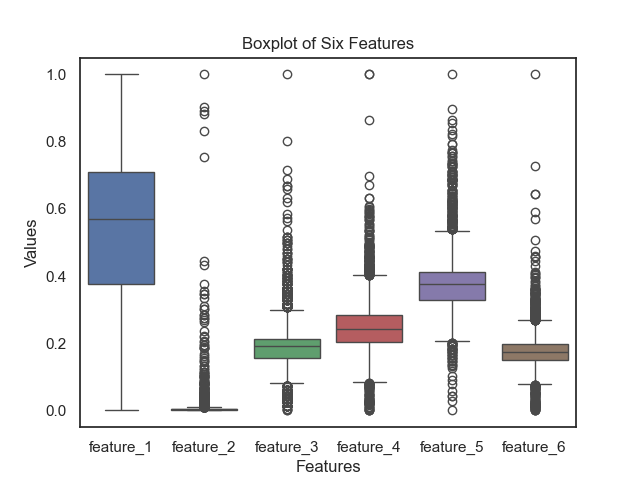

In [6]:
# feature distribution plot

fig, ax = plt.subplots()  

sns.boxplot(data=thyroid_features, ax=ax)
plt.title('Boxplot of Six Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [7]:
# LOF

lof_thyroid = sklearn.neighbors.LocalOutlierFactor(n_neighbors=80)
LOF_predictions = lof_thyroid.fit_predict(thyroid_features)

# f1 for sanity (i know how to use it)
sklearn.metrics.f1_score(thyroid_labels, LOF_predictions, average='binary')

0.9661443760492445

In [8]:
# isolation forest

isolaton_forest_thyroid = sklearn.ensemble.IsolationForest()
isolaton_forest_predictions = isolaton_forest_thyroid.fit_predict(thyroid_features)

# f1
sklearn.metrics.f1_score(thyroid_labels, isolaton_forest_predictions, average='binary')

0.960214446952596

In [9]:
# one class SVM

svm_thyroid = sklearn.svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
svm_predictions = svm_thyroid.fit_predict(thyroid_features)

# f1
sklearn.metrics.f1_score(thyroid_labels, svm_predictions, average='binary')

0.9471303364433136

# Shuttle dataset analysys and tests

In [10]:
# shuttle dataset loading. The dataset cointains 9 features and 7 classes. Class '1' makes up 80% of the dataset. For ourlier detection class '4'is discarted and the other classes are combined. 
shuttle_colnames=['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'label']
shuttle_data = pd.read_csv('shuttle.tst', sep=' ', header=None, names=shuttle_colnames)

shuttle_data = shuttle_data[shuttle_data['label'] != 4] # remove class '4'

shuttle_features = shuttle_data[shuttle_colnames[:9]]
shuttle_labels = shuttle_data[shuttle_colnames[9]]

shuttle_labels[shuttle_labels == 1] = 1
shuttle_labels[(shuttle_labels == 2) | (shuttle_labels == 3) | (shuttle_labels == 5) | (shuttle_labels == 6) | (shuttle_labels == 7)] = -1


In [11]:
# LOF

lof_shuttle = sklearn.neighbors.LocalOutlierFactor(n_neighbors=80)
LOF_predictions_shuttle = lof_shuttle.fit_predict(shuttle_features)

# f1 for sanity (i know how to use it)
sklearn.metrics.f1_score(shuttle_labels, LOF_predictions_shuttle, average='binary')

0.963458262350937

In [12]:
# isolation forest

isolaton_forest_shuttle = sklearn.ensemble.IsolationForest()
isolaton_forest_predictions_shuttle = isolaton_forest_shuttle.fit_predict(shuttle_features)

# f1
sklearn.metrics.f1_score(shuttle_labels, isolaton_forest_predictions_shuttle, average='binary')

0.9737453116627969

In [13]:
# one class SVM

svm_shuttle = sklearn.svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
svm_predictions_shuttle = svm_shuttle.fit_predict(shuttle_features)

# f1
sklearn.metrics.f1_score(shuttle_labels, svm_predictions_shuttle, average='binary')

0.8144978853152356

# PR Curves

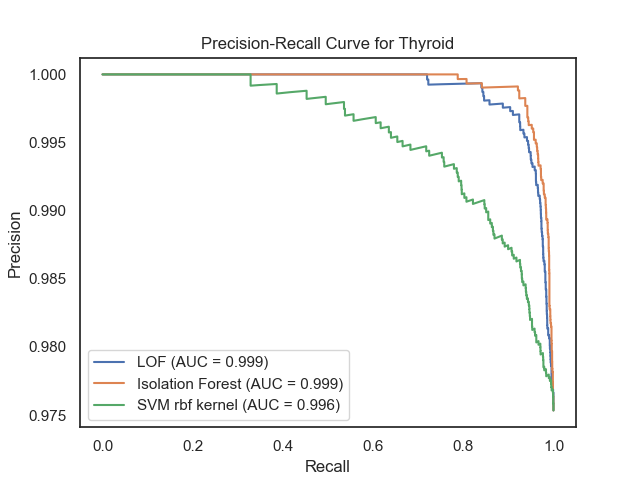

In [20]:
# PR curves

#thyroid_lof_scores = lof_thyroid.decision_function(thyroid_features)
thyroid_lof_scores = lof_thyroid.negative_outlier_factor_ 
precision_lof_thyroid, recall_lof_thyroid, _ = sklearn.metrics.precision_recall_curve(thyroid_labels, thyroid_lof_scores)
pr_auc_lof_thyroid = sklearn.metrics.auc(recall_lof_thyroid, precision_lof_thyroid)

thyroid_forest_scores = isolaton_forest_thyroid.decision_function(thyroid_features) 
precision_forest_thyroid, recall_forest_thyroid, _ = sklearn.metrics.precision_recall_curve(thyroid_labels, thyroid_forest_scores)
pr_auc_forest_thyroid = sklearn.metrics.auc(recall_forest_thyroid, precision_forest_thyroid)

thyroid_svm_scores = svm_thyroid.decision_function(thyroid_features) 
precision_svm_thyroid, recall_svm_thyroid, _ = sklearn.metrics.precision_recall_curve(thyroid_labels, thyroid_svm_scores)
pr_auc_svm_thyroid = sklearn.metrics.auc(recall_svm_thyroid, precision_svm_thyroid)
                                                              
plt.figure()

plt.plot(recall_lof_thyroid, precision_lof_thyroid, label=f'LOF (AUC = {pr_auc_lof_thyroid:.3f})')
plt.plot(recall_forest_thyroid, precision_forest_thyroid, label=f'Isolation Forest (AUC = {pr_auc_forest_thyroid:.3f})')
plt.plot(recall_svm_thyroid, precision_svm_thyroid, label=f'SVM rbf kernel (AUC = {pr_auc_svm_thyroid:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Thyroid')
plt.legend()
#plt.ylim([0.5,1])
plt.show()

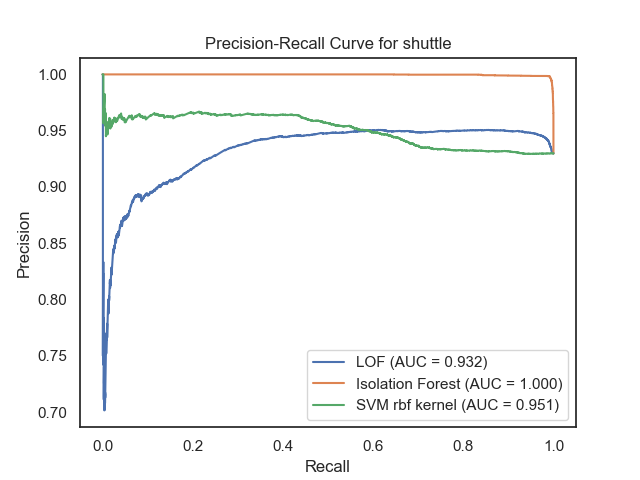

In [15]:
# PR curves

#shuttle_lof_scores = lof_shuttle.decision_function(shuttle_features)
shuttle_lof_scores = lof_shuttle.negative_outlier_factor_ 
precision_lof_shuttle, recall_lof_shuttle, _ = sklearn.metrics.precision_recall_curve(shuttle_labels, shuttle_lof_scores)
pr_auc_lof_shuttle = sklearn.metrics.auc(recall_lof_shuttle, precision_lof_shuttle)

shuttle_forest_scores = isolaton_forest_shuttle.decision_function(shuttle_features) 
precision_forest_shuttle, recall_forest_shuttle, _ = sklearn.metrics.precision_recall_curve(shuttle_labels, shuttle_forest_scores)
pr_auc_forest_shuttle = sklearn.metrics.auc(recall_forest_shuttle, precision_forest_shuttle)

shuttle_svm_scores = svm_shuttle.decision_function(shuttle_features) 
precision_svm_shuttle, recall_svm_shuttle, _ = sklearn.metrics.precision_recall_curve(shuttle_labels, shuttle_svm_scores)
pr_auc_svm_shuttle = sklearn.metrics.auc(recall_svm_shuttle, precision_svm_shuttle)
                                                              
plt.figure()

plt.plot(recall_lof_shuttle, precision_lof_shuttle, label=f'LOF (AUC = {pr_auc_lof_shuttle:.3f})')
plt.plot(recall_forest_shuttle, precision_forest_shuttle, label=f'Isolation Forest (AUC = {pr_auc_forest_shuttle:.3f})')
plt.plot(recall_svm_shuttle, precision_svm_shuttle, label=f'SVM rbf kernel (AUC = {pr_auc_svm_shuttle:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for shuttle')
plt.legend()
plt.show()